# Scikit-learn

The scikit-learn package contains a broad range of open source computational tools for data science and predictive analytics. The scikit-learn package is built on NumPy, SciPy and matplotlib and includes functions and methods for classification, regression, clustering, neural networks and data transformations, as well as many other forms of stistical machine learning. Rather than try to cover lots of different tools, we will focus on a simple example and try to demonstrate how you can go about learning how to use the tools in scikit-learn independently.

The scikit-learn package has good documentation, which includes descriptions of the statistics as well as examples of code. In this notebook, we will look at how to fit a regression model to data using the [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). In linear regression, the response variable (or target value) is assumed to be a linear combination of the explanatory variables (features) plus random, normally distributed noise. If there is only one explanatory variable, then we are trying to fit a straight line to data.

The [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) includes the following code (which should run quickly, although it may take longer the first time you use the scikit-learn pacakge):

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


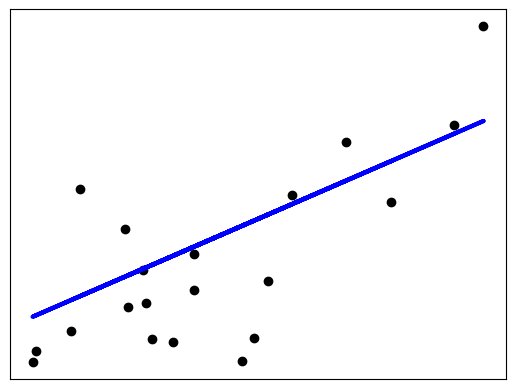

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The output prints the coefficient value, a measure of error, the $R^2$ metric and an illustration of the fit to the data. That was pretty easy! **But are we now able to use the scikit-learn package to do regression?** Probably we need to do a bit more work before we will feel confident applying it in a new setting. 

In this notebook, it is assumed that you **do not** have a detailed understanding of regression, and while some explanation will be provided, it will not be enough to enable you to apply regression effectively to other situations. Our focus will be how to use the programs, how to find out about there settings, and what effects these have, rather than how the statistical methods (regression in this case) work.

So let's dig into this example in a little more detail.

The first lines of code are:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

These import a variety of tools from matplotlib, NumPy and scikit-learn. Usually we wouldn't know in advance what we would need, so we might start with nothing, or perhaps matplotlib and NumPy, then add packages and functions as we require them. The next line of code uses the `datasets` function from `sklearn`:

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

The [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) helpfully includes a [link to the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) for the `load_diabetes` method. **Have a look at this documentation.** It describes what the `return_X_y` parameter does, as well as what the other parameters are, what they do and what is returned.

Note that this documentation is really helpful. It would be really hard to work out how the function works without it. Unfortunately not all documentation is this good, and often when you start using a new package, you may have to spend time searching online through documentation, tutorials and discussion forums to find out how it works. Similarly, you will also benefit from documenting your own work, by writing descriptions of what you've done, what resources you used and where to find them. This is especially important if you share your code online.

Since the `return_X_y` parameter is `True`, the `diabetes_X` variable is the (explanatory) data and the `diabetes_y` variable is the target (response). Let's have a look at these.

In [4]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
diabetes_X.shape

(442, 10)

In [6]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
diabetes_y.shape

(442,)

Both variables have 442 rows, but `diabetes_X` has 10 columns, whereas `diabetes_y` is one-dimensional; `diabetes_X` seems to contain positive and negative decimals, whereas `diabetes_y` seems to be positive integers.

Some natural questions we might ask are where does this data come from? What do the values refer to? Has any scaling been applied to the data? How could we visulalise the data? What might we be able to do with the data?

The scikit-learn documentation has [descriptions of the data sets that come with the package](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset), which also has a [link to the diabetes source data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) and [further information](https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf) about the diabetes data. The [further information](https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf) is a paper that uses the data to demonstrate a statistical method called "Least Angle Regression" (LARS). It is worth having a look at the paper, but what you should realise is that it focuses on the LARS method and has very little description about the data, its source and what we might infer from analysing it. However, the web page with the [source data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) does include the [raw data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). 

### Exercise 1
Experiment with the parameters for `load_diabetes`. What format does the data take when there no parameters are given? Can you get the data as a pandas dataframe? Check that the [raw data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) online matches up with the data that you get when we call the `load_diabetes` method with the `scaled` parameter set to `False`.

The `diabetes_X` variable has 10 columns, and the [scikit-learn documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) lists these as
* age - age in years
* sex - this is represented as either 1 or 2
* bmi - body mass index
* bp - average blood pressure
* s1 tc - total serum cholesterol
* s2 ldl - low-density lipoproteins
* s3 hdl - high-density lipoproteins
* s4 tch - total cholesterol / HDL
* s5 ltg - possibly log of serum triglycerides level
* s6 glu - blood sugar level

We might assume that this order corresponds to the order of the columns in the data, but it's a good thing to check. To do this, we might look at the [raw data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) for example. You'd be surprised how often mistakes like incorrectly labelling data occur, and how much time it can take to find them.

Let's continue to work through the example code. The next line is:

In [8]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]  # equivalent to diabetes_X[:, 2].reshape(-1, 1)

#TRY
#diabetes_X[:, 2].shape    # (442,) → 1D array
#diabetes_X[:, np.newaxis, 2].shape    # (442, 1)

This line reasigns `diabetes_X` to its third column and the `np.newaxis` attribute makes the resulting array two-dimensional:

In [9]:
diabetes_X.shape

(442, 1)

i.e. it has 442 rows and 1 column. Compare this to if we had just taken the third column of `diabetes_X`:

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X[:,2].shape

The reason we need `diabetes_X` to be two-dimensional is because the `fit` method that uses this data expects two-dimensional arrays and will produce an error if we give it data without a second dimension.

We can also make `diabetes_X` two-dimensional by using `np.newaxis` in the third position (which may seem more intutitive):

In [ ]:
diabetes_X=diabetes_X[:,2,np.newaxis]
diabetes_X.shape

The next lines of code divide the data and target up into training and testing sets:

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Here 20 data points have been used as testing data. The training set will be used to fit the model, then the training set will be used to evaluate how good the model fits.

The next line of code creates an instance of the `linear_model` class, which has the methods needed to fit the data using a linear model.

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

Again, the [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) has a link to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) for the `linear_model` class where you can find out about the parameters that can be used, as well as the attributes and methods of the class. Note that many of the attributes only appear once the model has been fitted.

The next line fits the linear model to the data.

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

You can see the attributes and methods asigned to `regr` by typing `regr.` and pressing the auto-complete button tab:

In [ ]:
# Add a . after regr and press tab to see the attributes and methods
regr

Fitting the model to the data has caused a lot of things to happen that we only see the result of, which is why it's important to know the theory that underpins linear regression (which is covered elsewhere in the Data Science (Statistics) programme). However, the package may also make decisions about the best numerical methods to use in a given situation. You may have to find out about these as well if you get errors when you try to apply the method to your data, or if the method takes too long. You may be able to determine this from the documentation, but with open source software, you may have to go to the source code.

The next line of code uses the fitted model to predict the target values for the testing data.

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

The linear model that we have fitted is the straight line through the data that minimises the sum of squared errors. Predictions are then the corresponding points along this line - we will visualise this shortly.

The next line prints out the regression coefficient

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)

This is the slope of the line. It would also be useful to know the intercept:

In [ ]:
print("Intercept: \n",regr.intercept_)

The next two lines compute the mean squared error between the testing set and the model predictions as well as the $R^2$ value.

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

The smaller the mean squared error the better the prediction, but is this value small or large? The mean squared error is computed by taking the mean of the square of the difference between points in the testing set and the corresponding predictions. One comparison we could use is with the mean squared error between the training data and the corresponding predictions. Computing this we get:

In [ ]:
diabetes_y_pred_train = regr.predict(diabetes_X_train)
print(f"Mean squared error of training data: {mean_squared_error(diabetes_y_train, diabetes_y_pred_train):.2f}")

So the testing error is smaller than this, which may seem like a good thing. However, if our linear model of the data is accurate then really we are just lucky that our (relatively small) training set has smaller error. If it was much different then it might be good to question why - how was the training set chosen? Ideally this would be a random sample of the data. Also, this being a mean squared error, larger errors contribute significantly more to the value of the error metric. Therefore we might also consider other error metrics.

We saw above that the $R^2$ was 0.47. The $R^2$, or coefficient of determination, measures how much of the variation in the target variable is predicted by the variation in the data. The $R^2$ varies between 0 and 1, where a perfect fit results in an $R^2$ close to 1, and an $R^2$ equal to Zero suggests that the fit is no better estimate than the average of the data. Here 47% of the variation in the target variable is predicted by the variation in the data, so this isn't a particularly good fit. This will become clearer from plotting the results, as the next lines in the example do.

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In this plot, the points correspond to the testing data and the line is the model. Note that the predictions have been used to draw this line. In principle we could have used the intercept and coefficient to plot this line, but using the predictions proves convenient here.

Given that this plot was used as an example of how to do linear regression in scikit-learn, it perhaps isn't important to include values on the axes or labels. However, in this form it doesn't allow us to infer much from the regression, so there is certainly room to improve how informative this figure is. Below is an alternative plot, and you may consider how this could also be improved.

In [ ]:
# Figure parameters
# lwt=2 # linewidth
ms=20 # marker size

# Better to use unscaled bmi.
diabetes_X_unscaled, _ = datasets.load_diabetes(return_X_y=True,scaled=False)
diabetes_X_unscaled=diabetes_X_unscaled[:,2]
diabetes_X_unscaled_train=diabetes_X_unscaled[:-20]
diabetes_X_unscaled_test=diabetes_X_unscaled[-20:]

plt.scatter(diabetes_X_unscaled_train, diabetes_y_train, s=ms,color=0.9*np.ones(3),zorder=0)
for i in range(len(diabetes_X_unscaled_test)):
    plt.plot([diabetes_X_unscaled_test[i],diabetes_X_unscaled_test[i]],
             [diabetes_y_pred[i],diabetes_y_test[i]],color="red",zorder=1,linewidth=1)
plt.plot(diabetes_X_unscaled_train, diabetes_y_pred_train, color="blue", linewidth=2,zorder=2)
plt.scatter(diabetes_X_unscaled_test, diabetes_y_test, s=ms, color="black",zorder=3)

plt.xlabel('Body Mass Index')
plt.ylabel('Disease propagation measure');

In this figure we can see the training data in light gray markers, as well as the testing data in black markers. The blue line indicates the linear model fit and the red lines indicate the errors (i.e. the difference between the data and the predicted values along the line of best fit). The explanatory variable is body mass index (BMI), and the unscaled values have been plotted. It's not clear exactly what the target variable is, but the reference paper refers to this as "a measure of disease propagation one year after baseline".

From this figure it should be clear that we might use our linear regression to ask whether BMI could be used to predict disease propagation. The results suggest that BMI is positively correlated with the measure of disease propagation, but the relatively small $R^2$ value suggests that BMI alone is not a strong predictor of disease propagation. In this figure we can see more clearly that the testing data does not represent the variation seen in the training data, and hence why the mean squared error was relatively small.

### Exercise 1 solution

First load up the data with no parameters:

In [ ]:
data = datasets.load_diabetes()

In [ ]:
data

With no parameters, a dictionary-like object called a "[bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch)" is returned. This includes, the data, the target, feature names, a description of the data, as well as the data file names.

In [ ]:
data = datasets.load_diabetes(as_frame=True)
data['frame']

If we want to view the data as a pandas dataframe, we should import pandas first.

In [ ]:
import pandas as pd

When `as_frame=True`, a bunch is still returned, but the pandas data frame can be accessed via the `frame` attribute.

Now let's set remove the scaling.

In [ ]:
data = datasets.load_diabetes(as_frame=True,scaled=False)
data['frame']

The numbers here seem to match up with the [raw data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt).